# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')
print(customers.shape)
customers.head()


(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.isnull().values.any()

False

In [6]:
customers['Region'].unique()

array([3, 1, 2])

In [7]:
customers['Channel'].unique()

array([2, 1])

In [8]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


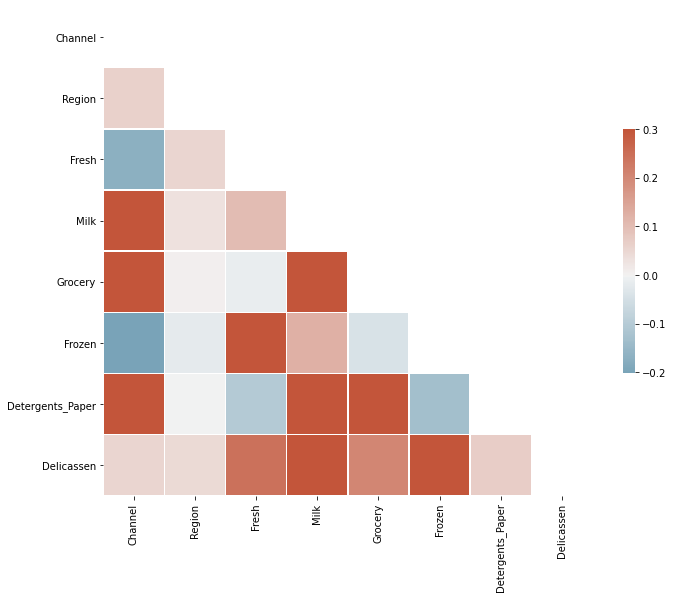

In [9]:
# Compute the correlation matrix
corr = customers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [10]:
customers.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

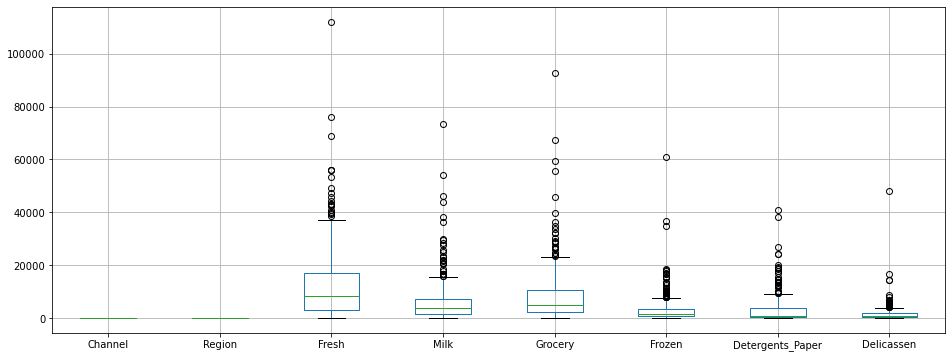

In [11]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 6))

customers.boxplot(column=list(customers.columns));

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [12]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [13]:
product_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [14]:
spent_by_category = customers[product_categories]
spent_by_category

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [15]:
spent_by_category_df = spent_by_category.sum(axis = 0, skipna = True).to_frame()
spent_by_category_df = spent_by_category_df.rename(columns={0: 'total_spent'})
spent_by_category_df

,total_spent
Fresh,5280131
Milk,2550357
Grocery,3498562
Frozen,1351650
Detergents_Paper,1267857
Delicassen,670943


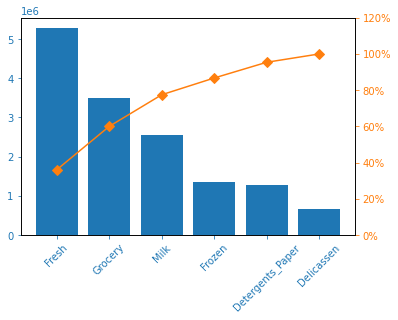

In [16]:
# Your code here:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

spent_by_category_df = spent_by_category_df.sort_values(by='total_spent',ascending=False)
spent_by_category_df["cumpercentage"] = spent_by_category_df["total_spent"].cumsum()/spent_by_category_df["total_spent"].sum()*100


fig, ax = plt.subplots()
ax.bar(spent_by_category_df.index, spent_by_category_df["total_spent"], color="C0")
ax.tick_params(axis='x', labelrotation=45, colors="C0")
ax2 = ax.twinx()
ax2.set_ylim(0, 120)
ax2.plot(spent_by_category_df.index, spent_by_category_df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [17]:
spent_by_category_df

,total_spent,cumpercentage
Fresh,5280131,36.117042
Grocery,3498562,60.047833
Milk,2550357,77.492732
Frozen,1351650,86.738261
Detergents_Paper,1267857,95.410630
Delicassen,670943,100.000000


In [18]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [19]:
total_spent_by_transaction = customers.copy()
total_spent_by_transaction['total_spent'] = customers[product_categories].sum(axis=1, skipna=False)
total_spent_by_transaction

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spent
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


In [20]:
total_spent_by_transaction['spent_cumsum'] = total_spent_by_transaction['total_spent'].cumsum()
total_spent_by_transaction['transaction_perc'] = 100*(total_spent_by_transaction['total_spent'] / total_spent_by_transaction['total_spent'].sum())
total_spent_by_transaction['accum_per'] = total_spent_by_transaction['transaction_perc'].cumsum()
total_spent_by_transaction


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spent,spent_cumsum,transaction_perc,accum_per
0,2,3,12669,9656,7561,214,2674,1338,34112,34112,0.233332,0.233332
1,2,3,7057,9810,9568,1762,3293,1776,33266,67378,0.227545,0.460878
2,2,3,6353,8808,7684,2405,3516,7844,36610,103988,0.250419,0.711297
3,1,3,13265,1196,4221,6404,507,1788,27381,131369,0.187291,0.898588
4,2,3,22615,5410,7198,3915,1777,5185,46100,177469,0.315332,1.213920
...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,14468298,0.501399,98.965751
436,1,3,39228,1431,764,4510,93,2346,48372,14516670,0.330873,99.296624
437,2,3,14531,15488,30243,437,14841,1867,77407,14594077,0.529478,99.826102
438,1,3,10290,1981,2232,1038,168,2125,17834,14611911,0.121988,99.948090


In [21]:
total_spent_by_transaction[~(total_spent_by_transaction['accum_per'] >= 80)]

# If evaluated in specific order of transaction/customer, 80% of the revenue was achieved at transaction row 334.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spent,spent_cumsum,transaction_perc,accum_per
0,2,3,12669,9656,7561,214,2674,1338,34112,34112,0.233332,0.233332
1,2,3,7057,9810,9568,1762,3293,1776,33266,67378,0.227545,0.460878
2,2,3,6353,8808,7684,2405,3516,7844,36610,103988,0.250419,0.711297
3,1,3,13265,1196,4221,6404,507,1788,27381,131369,0.187291,0.898588
4,2,3,22615,5410,7198,3915,1777,5185,46100,177469,0.315332,1.213920
...,...,...,...,...,...,...,...,...,...,...,...,...
328,1,2,16933,2209,3389,7849,210,1534,32124,11441661,0.219734,78.263012
329,1,2,5113,1486,4583,5127,492,739,17540,11459201,0.119977,78.382988
330,1,2,9790,1786,5109,3570,182,1043,21480,11480681,0.146927,78.529916
331,2,2,11223,14881,26839,1234,9606,1102,64885,11545566,0.443825,78.973741


In [22]:
top_transactions = customers.copy()
top_transactions['total_spent'] = top_transactions[product_categories].sum(axis=1, skipna=False)
top_transactions = top_transactions.sort_values('total_spent', ascending=False)
top_transactions['accum_spent'] = top_transactions['total_spent'].cumsum()
top_transactions['percentage'] = ((top_transactions['total_spent'] / top_transactions['total_spent'].sum()) * 100).round(2)
top_transactions['accum_per'] = top_transactions['percentage'].cumsum()
top_transactions

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spent,accum_spent,percentage,accum_per
85,2,3,16117,46197,92780,1026,40827,2944,199891,199891,1.37,1.37
47,2,3,44466,54259,55571,7782,24171,6465,192714,392605,1.32,2.69
181,1,3,112151,29627,18148,16745,4948,8550,190169,582774,1.30,3.99
183,1,3,36847,43950,20170,36534,239,47943,185683,768457,1.27,5.26
61,2,3,35942,38369,59598,3254,26701,2017,165881,934338,1.13,6.39
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,3,2101,589,314,346,70,310,3730,14610477,0.03,99.89
355,1,3,190,727,2012,245,184,127,3485,14613962,0.02,99.91
98,1,3,503,112,778,895,56,132,2476,14616438,0.02,99.93
97,1,3,403,254,610,774,54,63,2158,14618596,0.01,99.94


In [23]:
top_transactions[top_transactions['accum_per'] <= 80]

# In this case we still need 251 rows to reach at least 80% of revenue. So the Pareto principle does not apply exactly.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spent,accum_spent,percentage,accum_per
85,2,3,16117,46197,92780,1026,40827,2944,199891,199891,1.37,1.37
47,2,3,44466,54259,55571,7782,24171,6465,192714,392605,1.32,2.69
181,1,3,112151,29627,18148,16745,4948,8550,190169,582774,1.30,3.99
183,1,3,36847,43950,20170,36534,239,47943,185683,768457,1.27,5.26
61,2,3,35942,38369,59598,3254,26701,2017,165881,934338,1.13,6.39
...,...,...,...,...,...,...,...,...,...,...,...,...
84,2,3,11867,3327,4814,1178,3837,120,25143,11591549,0.17,79.25
302,2,2,2886,5302,9785,364,6236,555,25128,11616677,0.17,79.42
114,1,3,18044,1080,2000,2555,118,1266,25063,11641740,0.17,79.59
248,1,1,15671,5279,2406,559,562,572,25049,11666789,0.17,79.76


In [24]:
"""
CHANNEL Frequency
Horeca 298
Retail 142
Total 440
"""
print(total_spent_by_transaction['Channel'].value_counts(), '\n\n')

customers_by_channel = total_spent_by_transaction.groupby("Channel")["total_spent"].sum().to_frame().sort_values('total_spent', ascending=False)
customers_by_channel['percentage'] = (100 * (customers_by_channel['total_spent'] / customers_by_channel['total_spent'].sum())).round()
customers_by_channel

1    298
2    142
Name: Channel, dtype: int64 




,total_spent,percentage
Channel,,
1,7999569,55.0
2,6619931,45.0


In [25]:
"""
REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440
"""
print(total_spent_by_transaction['Region'].value_counts(), '\n\n')


customers_by_region = total_spent_by_transaction.groupby("Region")["total_spent"].sum().to_frame().sort_values('total_spent', ascending=False)
customers_by_region['percentage'] = (100 * (customers_by_region['total_spent'] / customers_by_region['total_spent'].sum())).round(2)
customers_by_region


3    316
1     77
2     47
Name: Region, dtype: int64 




,total_spent,percentage
Region,,
3,10677599,73.04
1,2386813,16.33
2,1555088,10.64


In [26]:
# Your observations here

# Rows can be interpreted as unique client transactions and they provide information of disbursement by Trade Channel, Region and Product Category.
# A ['total_spent'] column was added to rank the hightest transactions.
# The highest transaction in this dasatet amounted to 1.37% of total sample revenue.
# Categories in order of relevance are ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
# Fresh and Grocery are 60% of the business, when Milk is added this surges to 77%.
# In terms of Channels, HORECA is 55% of the revenue in 298 Points of Sale, and Retail has 45% of the business in only 142 POS. (Less Atomized)
# 73% of the Revenue is atomized among "Other regions". Lisbon makes 16% and Oporto 11% of the revenue.


# This is a sample of a larger dataset as stated in the description.

"""
Citation Request:

The data set is originated from a larger database referred on:

Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon
"""




'\nCitation Request:\n\nThe data set is originated from a larger database referred on:\n\nAbreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [27]:
# Your code here

customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [28]:
# Your comment here

# If i'm going to try to predict in the future how much will be spent, I should calculate and add the total_spent column because it summarizes all the categories.
# That column would become my target column.
#But since I just want to group transaction or customer patterns I dont think its necesary.

"""
Q: Scikit-learn doesn't like categorical features as strings, like 'female', it needs numbers. How do I encode this?
Use either numeric encoding or one-hot encoding from the above sections. As a guide, you'll want to use one-hot encodind when there's no inherent order to your category, and numeric otherwise.
"""
#Source: https://www.kaggle.com/getting-started/27270

# Maybe we should use one hoy encoding to categorize Cities and Channel because our numbers should not add any inherent order.

"\nQ: Scikit-learn doesn't like categorical features as strings, like 'female', it needs numbers. How do I encode this?\nUse either numeric encoding or one-hot encoding from the above sections. As a guide, you'll want to use one-hot encodind when there's no inherent order to your category, and numeric otherwise.\n"

In [29]:
pd.get_dummies(customers['Channel'], prefix='Channel')

,Channel_1,Channel_2
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
435,1,0
436,1,0
437,0,1
438,1,0


In [30]:
pd.get_dummies(customers['Region'], prefix='Region')

,Region_1,Region_2,Region_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
435,0,0,1
436,0,0,1
437,0,0,1
438,0,0,1


In [31]:
customers = pd.concat([customers, pd.get_dummies(customers['Channel'], prefix='Channel')], axis=1)
customers = pd.concat([customers, pd.get_dummies(customers['Region'], prefix='Region')], axis=1)
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,2,3,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,2,3,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,1,3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,2,3,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,1,3,39228,1431,764,4510,93,2346,1,0,0,0,1
437,2,3,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,1,3,10290,1981,2232,1038,168,2125,1,0,0,0,1


In [32]:
product_categories

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [33]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

customers_num = customers[product_categories]

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers_num)

# Preview 

customers_scaled_df = pd.DataFrame(customers_scaled)
customers_scaled_df

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [34]:
customers_scaled_df.columns = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
customers_scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [35]:
channels_regions_encoded = ['Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3']
customers_cat = customers[channels_regions_encoded]
customers_cat

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
435,1,0,0,0,1
436,1,0,0,0,1
437,0,1,0,0,1
438,1,0,0,0,1


In [36]:
customers_for_ml = pd.concat([customers_cat, customers_scaled_df], axis=1)
customers_for_ml

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1,0,0,1,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0,1,0,0,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0,1,0,0,1,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,0,0,0,1,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0,1,0,0,1,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...,...,...,...
435,1,0,0,0,1,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,0,0,0,1,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0,1,0,0,1,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,0,0,0,1,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [37]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42).fit(customers_for_ml)

klabels = kmeans.labels_

customers['k_labels'] = klabels

customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,k_labels
0,2,3,12669,9656,7561,214,2674,1338,0,1,0,0,1,5
1,2,3,7057,9810,9568,1762,3293,1776,0,1,0,0,1,5
2,2,3,6353,8808,7684,2405,3516,7844,0,1,0,0,1,5
3,1,3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
4,2,3,22615,5410,7198,3915,1777,5185,0,1,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,0,0,0,1,0
436,1,3,39228,1431,764,4510,93,2346,1,0,0,0,1,7
437,2,3,14531,15488,30243,437,14841,1867,0,1,0,0,1,3
438,1,3,10290,1981,2232,1038,168,2125,1,0,0,0,1,4


Count the values in `labels`.

In [38]:
# Your code here:

customers['k_labels'].nunique()

8

In [39]:
customers['k_labels'].value_counts()

4    195
5    104
0     51
7     49
3     30
2      5
6      5
1      1
Name: k_labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [40]:
# Your code here

from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=1.5, min_samples=25).fit(customers_for_ml)

dbscan_c

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=25, n_jobs=None, p=None)

In [41]:
dbslabels = dbscan_c.labels_ 

customers['dbs_labels'] = dbslabels

customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,k_labels,dbs_labels
0,2,3,12669,9656,7561,214,2674,1338,0,1,0,0,1,5,0
1,2,3,7057,9810,9568,1762,3293,1776,0,1,0,0,1,5,0
2,2,3,6353,8808,7684,2405,3516,7844,0,1,0,0,1,5,-1
3,1,3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,1,0,0,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,0,0,0,1,0,-1
436,1,3,39228,1431,764,4510,93,2346,1,0,0,0,1,7,0
437,2,3,14531,15488,30243,437,14841,1867,0,1,0,0,1,3,-1
438,1,3,10290,1981,2232,1038,168,2125,1,0,0,0,1,4,0


Count the values in `labels_DBSCAN`.

In [42]:
# Your code here

customers['dbs_labels'].nunique()

2

In [43]:
customers['dbs_labels'].value_counts()

 0    372
-1     68
Name: dbs_labels, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

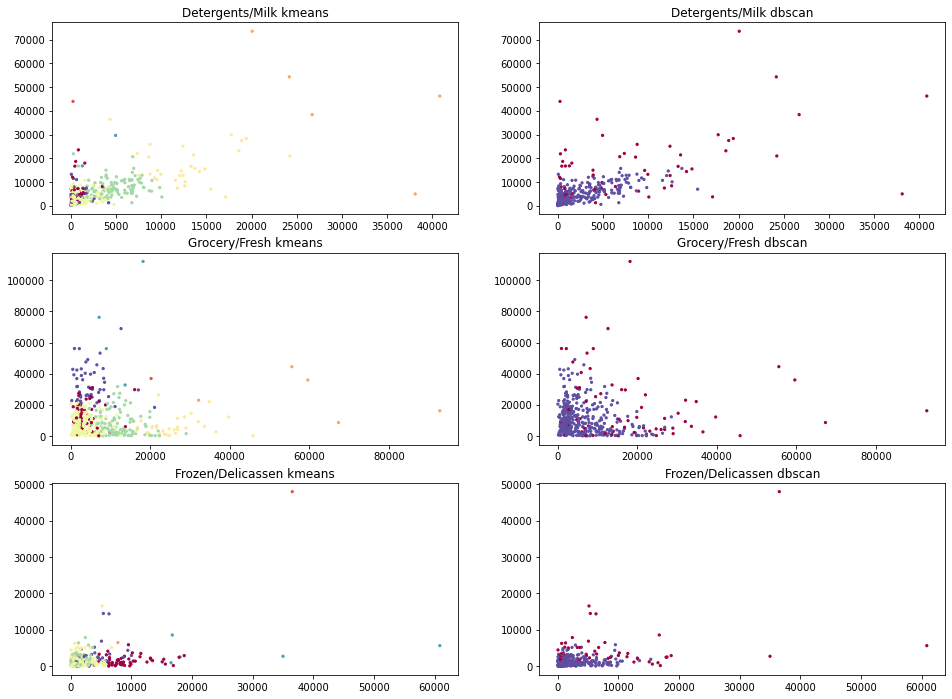

In [46]:
# Your code here:

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 12))
axes[0,0].set_title('Detergents/Milk kmeans')
axes[0,0].scatter(customers['Detergents_Paper'], customers['Milk'], c=kmeans.labels_, cmap='Spectral', s=5)

axes[0,1].set_title('Detergents/Milk dbscan')
axes[0,1].scatter(customers['Detergents_Paper'], customers['Milk'], c=dbscan_c.labels_, cmap='Spectral', s=5)

axes[1,0].set_title('Grocery/Fresh kmeans')
axes[1,0].scatter(customers['Grocery'], customers['Fresh'], c=kmeans.labels_, cmap='Spectral', s=5)

axes[1,1].set_title('Grocery/Fresh dbscan')
axes[1,1].scatter(customers['Grocery'], customers['Fresh'], c=dbscan_c.labels_, cmap='Spectral', s=5)

axes[2,0].set_title('Frozen/Delicassen kmeans')
axes[2,0].scatter(customers['Frozen'], customers['Delicassen'], c=kmeans.labels_, cmap='Spectral', s=5)

axes[2,1].set_title('Frozen/Delicassen dbscan')
axes[2,1].scatter(customers['Frozen'], customers['Delicassen'], c=dbscan_c.labels_, cmap='Spectral', s=5)

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [50]:
# Your code here:

customers.groupby('k_labels')[product_categories].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
k_labels,,,,,,
0,13520.254902,4734.313725,3988.568627,9370.215686,577.294118,1496.490196
1,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
2,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
3,6334.800000,16924.866667,26145.600000,1839.800000,12752.266667,2506.466667
4,7693.005128,2495.666667,3253.379487,1692.928205,734.589744,872.769231
5,7801.759615,7916.278846,12021.413462,1289.038462,4966.057692,1484.375000
6,57700.200000,11295.600000,9968.800000,29437.800000,1709.800000,4054.600000
7,33381.061224,3540.448980,5076.857143,3214.102041,764.755102,2308.224490


In [53]:
customers.groupby('dbs_labels')[product_categories].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
dbs_labels,,,,,,
-1,18990.044118,14878.897059,18949.367647,7001.750000,7547.926471,3831.602941
0,10722.602151,4136.000000,5940.873656,2353.577957,2028.489247,1103.209677


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# In this case K Means seems more useful to try to cluster different client profiles.

#DBSCAN maybe helps to try to cluster something like hight value or Key Accounts vs. Average Spent.


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here